Assignment 1

Bijay Adhikari (C0883819)

Github link: https://github.com/Bijay555/AML_3014

In [4]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ddshi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Knowing about DataSet

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

+ The period from June 2012 to September 2012.
+ The dataset includes 14 attributes and 1 output attribute (class).
+ The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

##### Following are the features in the dataset
1. day - Day
2. month - Month
3. year - Year which is 2012
4. Temperature - temperature noon (temperature max) in Celsius degrees: 22 to 42
5. RH - Relative Humidity in %: 21 to 90
6. Ws - Wind speed in km/h: 6 to 29
7. Rain - total day in mm: 0 to 16.8
8. FFMC - Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
9. DMC - Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
10. DC - Drought Code (DC) index from the FWI system: 7 to 220.4
11. ISI - Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
12. BUI - Buildup Index (BUI) index from the FWI system: 1.1 to 68
13. FWI - Fire Weather Index (FWI) Index: 0 to 31.1
14. Classes - Classes: two classes, namely fire and not fire.
15. Region - region: 2 region represented in the form of 0 and 1


In [6]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# from sklearn.pipeline import make_pipeline
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

In [110]:
# loading the data
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### data cleaning

In [111]:
# Looking the distribution of the data in each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


+the column 'year' has no use for the data insights and model building. 

In [112]:
# Deleting the columns that are not needed
df = df.drop('year', axis=1)

In [113]:
# checking the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    object 
 13  Region       243 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


+ There is no null value in the dataset and all the columns are numerical data type except classes.

In [114]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [115]:
# unique values in the classes column
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [116]:
df['Classes'] = df['Classes'].replace(['fire   ', 'fire ', 'not fire   ', 'not fire ', 'not fire     ', 'not fire    '], ['fire', 'fire', 'not fire', 'not fire', 'not fire', 'not fire'])

In [117]:
# counting the unique values in the Classes column
df['Classes'].value_counts(0)

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [118]:
# Replacing the categorical values into numeric using LabelEncoder

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Classes' column
df['Classes'] = label_encoder.fit_transform(df['Classes'])

# Printing the updated DataFrame
df['Classes'].unique()

array([1, 0])

### data visualization

In [119]:
# Setting style for plots
sns.set(style="whitegrid")

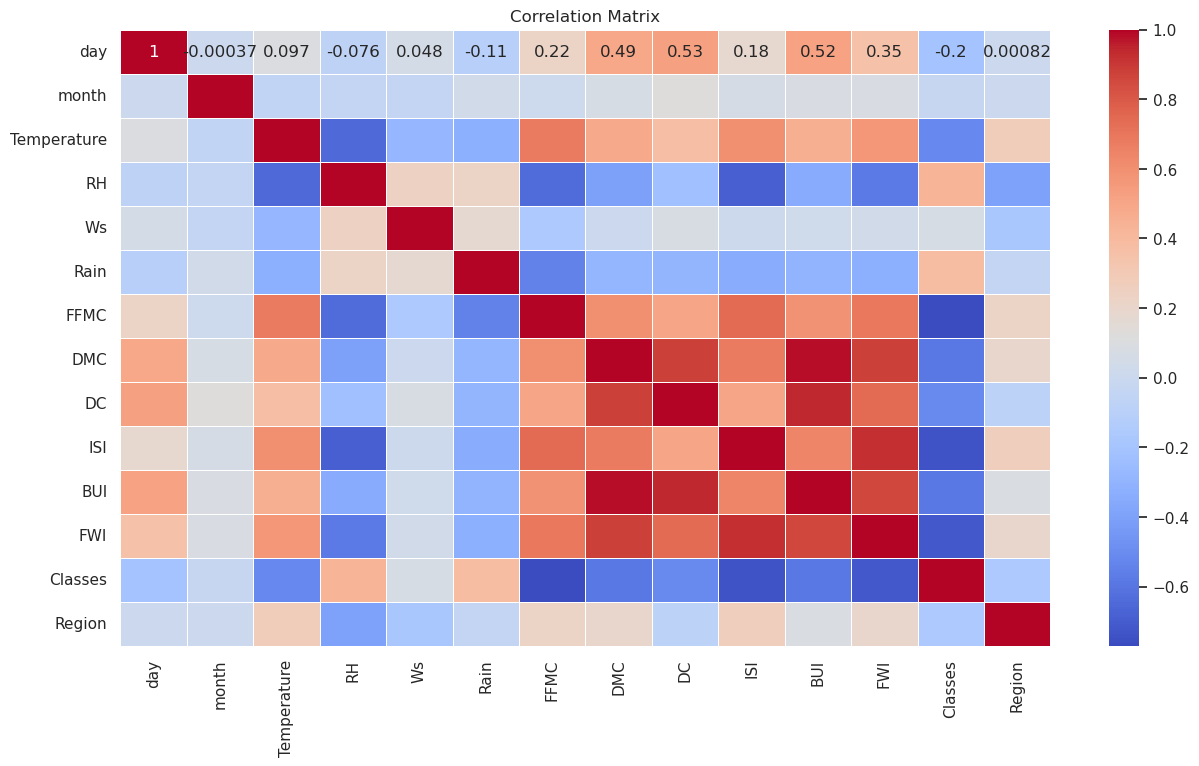

In [120]:
# Correlation matrix to understand relationships between variables 
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

+ There is a strong positive correlation between features like DMC and BUI,FWI AND ISI, DC and DMC, 
+ There is a strong negative correlation between features like  Temperature and RH, Classes and FFMC, Classes and ISI, Classes and FWI, RH and ISI


/home/bijay/anaconda3/envs/used_cars/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


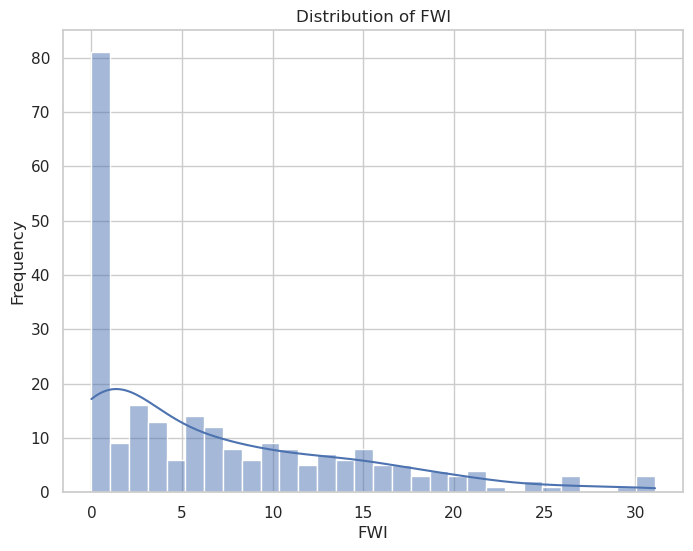

In [121]:
# Distribution of the target variable (FWI)
plt.figure(figsize=(8, 6))
sns.histplot(df['FWI'], kde=True, bins=30)
plt.title('Distribution of FWI')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

+ The distribution of FWI data is right-skewed. For lineear regression models, the dependent variable's residuals (errors) should ideally be normally distributed, but the predictor variables (features) themselves do not have to follow a normal distribution.

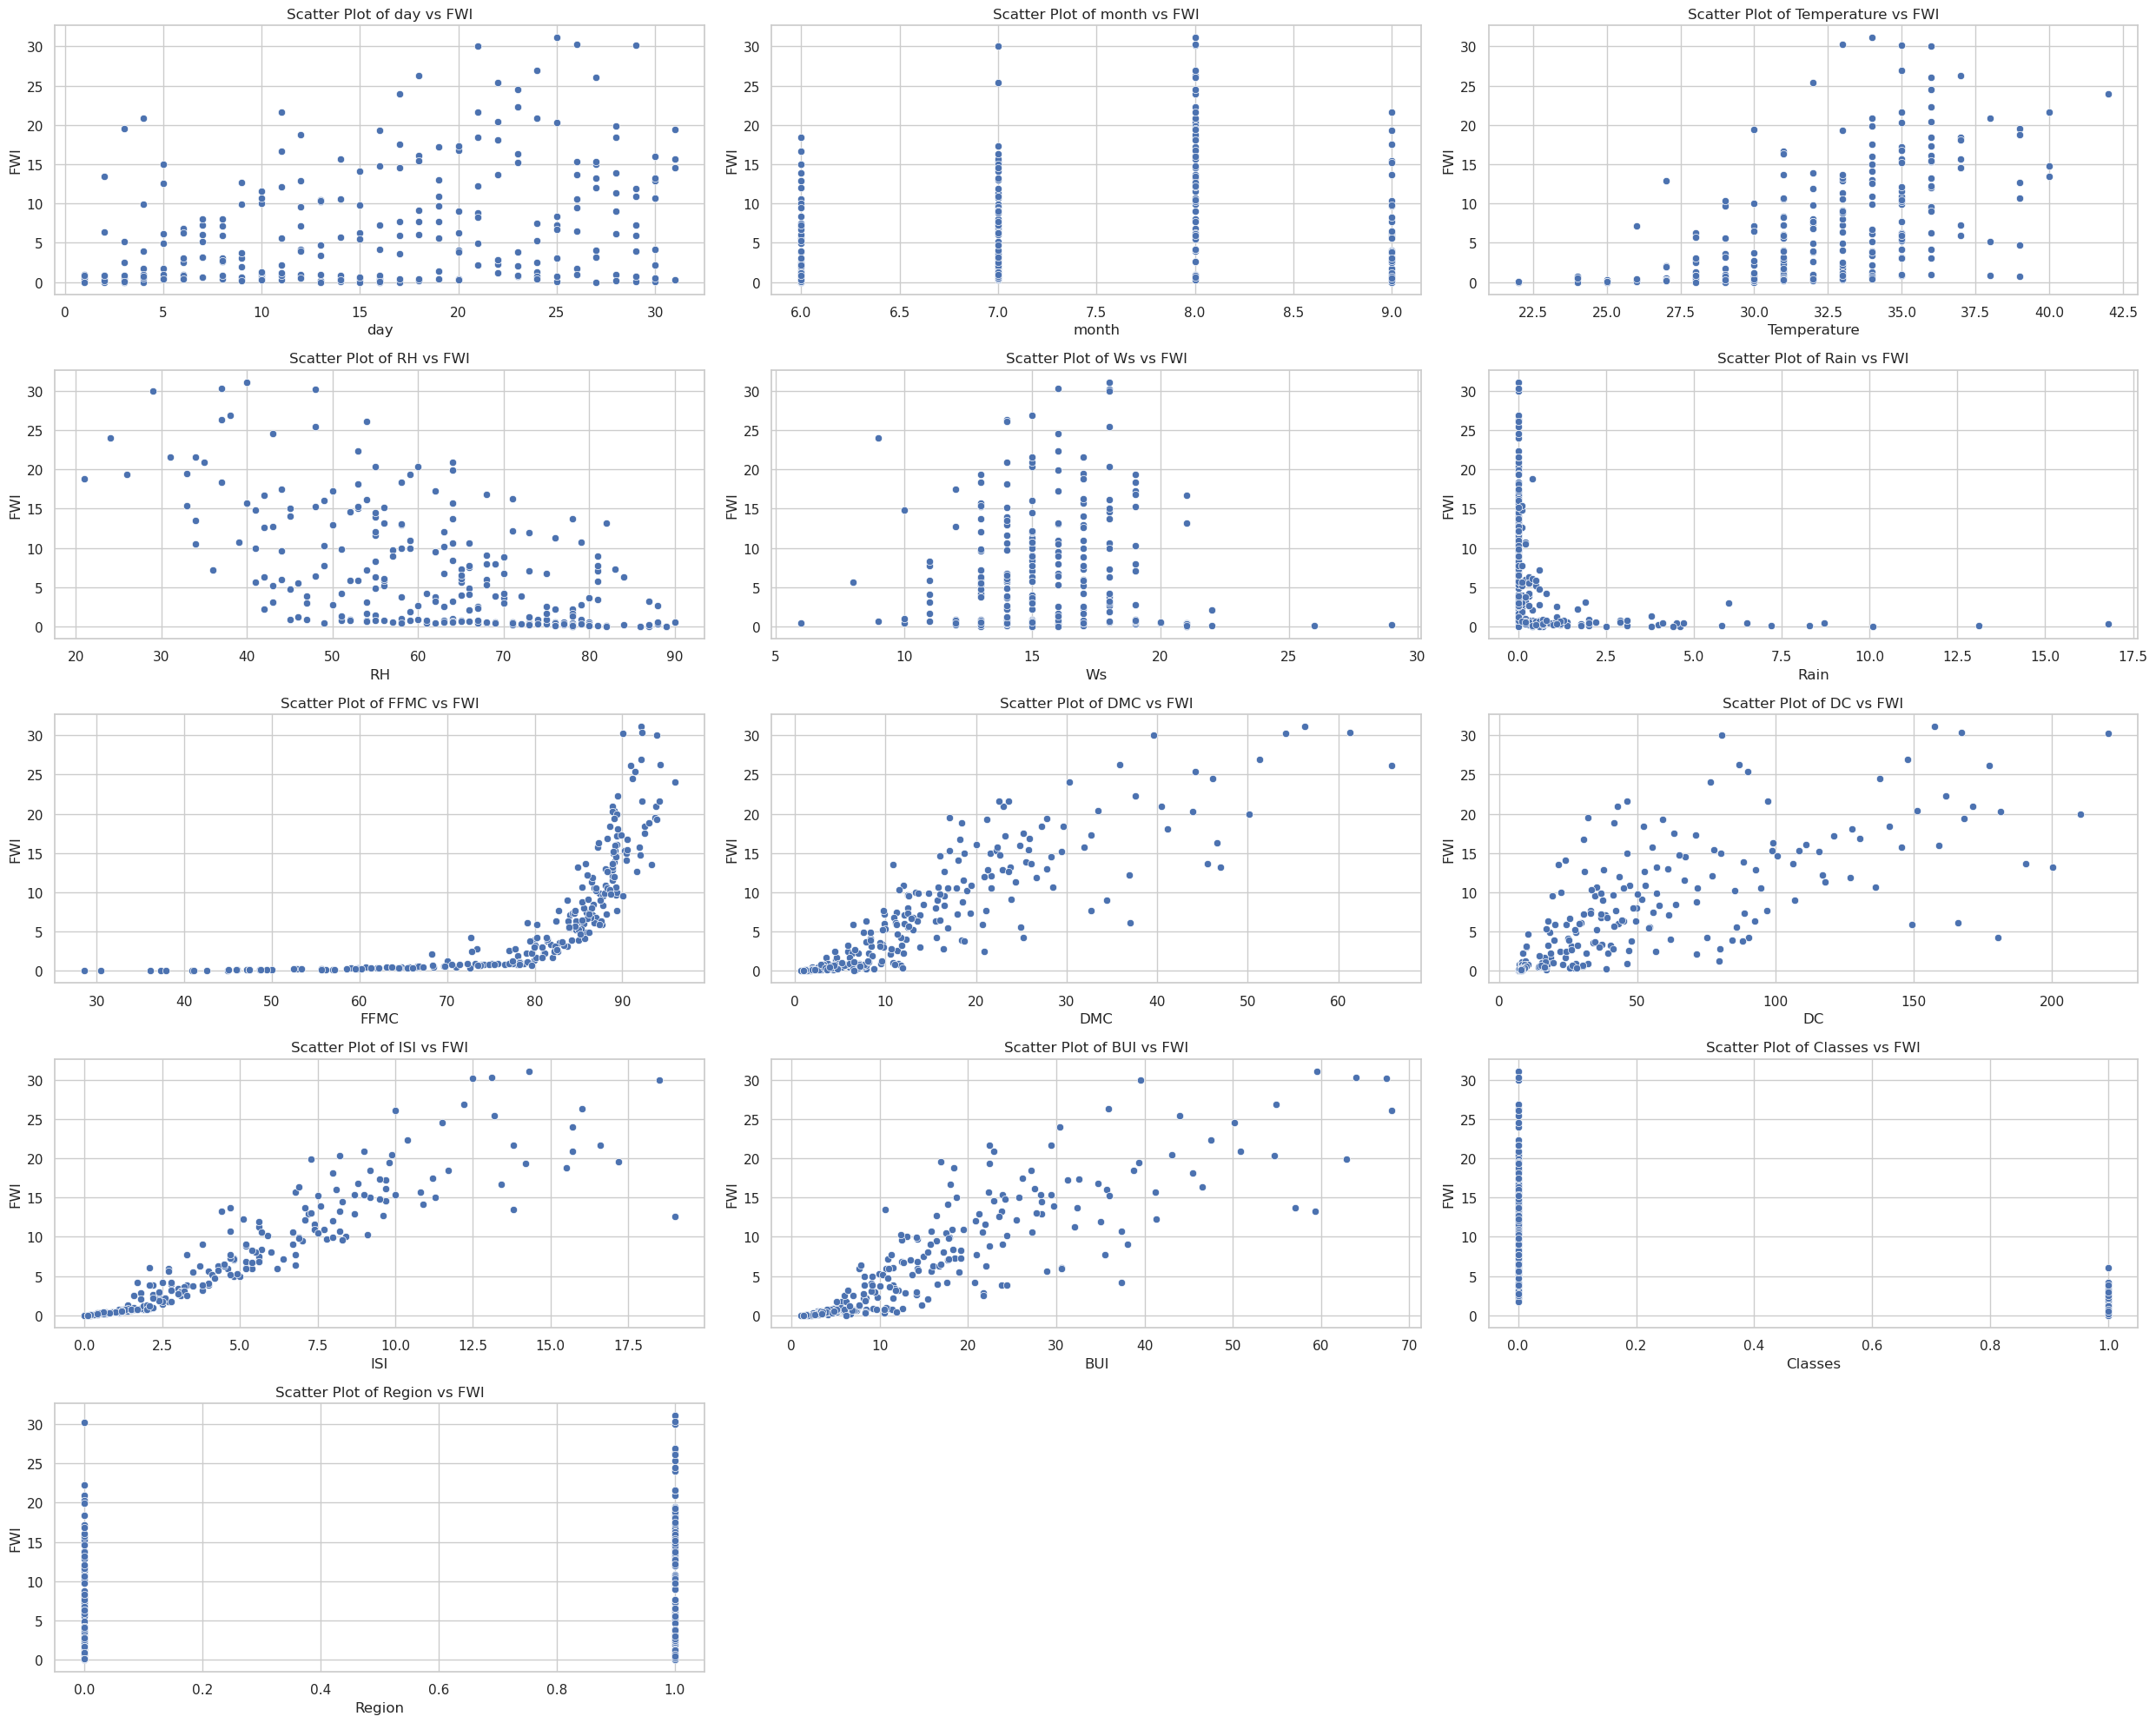

In [122]:
# Set plot size
plt.figure(figsize=(25, 20))

# List of independent variables (all columns except the target)
independent_vars = df.columns[df.columns != 'FWI']

# Loop through each independent variable and plot
for i, col in enumerate(independent_vars, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size based on the number of variables (4x3 in this case)
    sns.scatterplot(x=df[col], y=df['FWI'])
    plt.title(f'Scatter Plot of {col} vs FWI')
    plt.xlabel(col)
    plt.ylabel('FWI')

plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

+ Months and Region holds little to no meaning to target variable, "FWI". So I am removing them.

In [123]:
# removing the features "Region", "month" as they are not needed
df = df.drop(['Region', 'month'], axis=1)

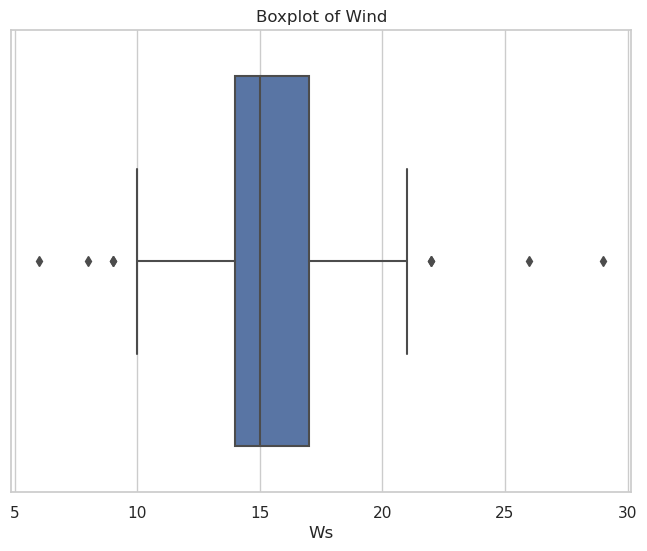

In [124]:
# Boxplot to check for outliers in features (e.g., wind)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Ws'])
plt.title('Boxplot of Wind')
plt.show()

+ There are few outliers but since the data is not too skewed, I will not remove them.

In [125]:
df.corr()

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840
Temperature,0.097227,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015
RH,-0.076034,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161
Ws,0.047812,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964
Rain,-0.112523,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097
FFMC,0.224956,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492
DMC,0.491514,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658
DC,0.527952,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123
ISI,0.180543,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197
BUI,0.517117,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639


In [126]:
# listing the important features for the target variable 'FWI'. 
df.corr()['FWI'].sort_values(ascending=False)

FWI            1.000000
ISI            0.922895
DMC            0.875864
BUI            0.857973
DC             0.739521
FFMC           0.691132
Temperature    0.566670
day            0.350781
Ws             0.032368
Rain          -0.324422
RH            -0.580957
Classes       -0.719216
Name: FWI, dtype: float64

### model building and evaluation

I will now move on to model development. This includes multiple linear regression, polynomial regression, and regularization models (Ridge, Lasso).

In [127]:
# Define features (X) and target (y)
X = df.drop('FWI', axis=1)  # All features except FWI
y = df['FWI']  # Target variable

In [128]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

#### Standardization

In [130]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Multiple Linear Regression

In [132]:
# Initialize and fit the multiple linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))

Linear Regression R²: 0.9892824621557071
Mean Squared Error: 0.3248316543310571


#### Polynomial Regression

In [133]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the features into polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial regression model
print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))

Polynomial Regression R²: 0.9964085180010561
Mean Squared Error: 0.1088521502014934


#### Regularization (Ridge and Lasso)

In [134]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Ridge model
print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))

# Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate Lasso model
print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))


Ridge Regression R²: 0.9834119584573955
Lasso Regression R²: 0.9822611207506413


### Model Evaluation and Testing


comparing the performance of the models using metrics such as R² and MSE, and then perform cross-validation and hyperparameter tuning.

Linear regression with polynomial features has outperform both multiple regression and Regularization techniques (Lasso and Ridge), so to perform cross validation I chose the Linear regression with polynomial features model. 

##### Cross-Validation & Hyperparameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Define the pipeline that includes PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Step 1: Create polynomial features
    ('linear', LinearRegression())  # Step 2: Apply linear regression
])

# Define parameter grid for GridSearchCV (for the degree of PolynomialFeatures)
param_grid = {'poly__degree': [2, 3, 4]}  # We use the 'poly__degree' to reference the degree parameter in the pipeline

# Perform GridSearchCV
poly_cv = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
poly_cv.fit(x_train_scaled, y_train)  # Fit the pipeline on scaled training data

# Best hyperparameters (degree of the polynomial)
print("Best parameters for Polynomial Regression:", poly_cv.best_params_)

# Evaluate the best model
best_poly_model = poly_cv.best_estimator_
y_pred_best_poly = best_poly_model.predict(X_test_scaled)

# Evaluate the performance
print("Best Polynomial Regression R²:", r2_score(y_test, y_pred_best_poly))

Best parameters for Polynomial Regression: {'poly__degree': 2}
Best Polynomial Regression R²: 0.9964085180010561


### Saving and Loading Models with Pickle

After training the models, we can save them as pickle files for future use.

In [138]:
import pickle

# Save the linear regression  with polynomial features model to a pickle file
with open('poly_model.pkl', 'wb') as file:
    pickle.dump(poly_cv, file)

# save the standard scaler  to a pickle file
with open('stdscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [145]:
# load the standard scaler from a pickle file
with open('stdscaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Load the model from the pickle file
with open('linear_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = pd.DataFrame({
    'day': [10, 20, 30],
    'Temperature': [32, 25, 39],
    'RH': [70, 45, 56],
    'Ws': [12, 20, 27],
    'Rain': [8.8, 7.3, 1.2],
    'FFMC': [20, 56, 88],
    'DMC': [11.4, 34.7, 23.7],
    'DC': [190.3, 112.1, 35.5],
    'ISI': [2.0, 8.0, 16.0],
    'BUI': [16.3, 34.2, 48.2],
    'Classes': [0.0, 0.0, 1.0]
})

# Test the loaded model on unseen data
test_data_scaled = loaded_scaler.transform(test_data)
y_pred_loaded = loaded_model.predict(test_data_scaled)
print("Predicted FWI values:", y_pred_loaded)


Predicted FWI values: [ 6.62636979 17.08908581 27.35810794]
